In [1]:
pip install -U fortran-magic

In [163]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [164]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [5]:
l = [1,'two',3.0,4,5.0,"six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [7]:
a = [True, "nine", 4, 1.43]
a

[True, 'nine', 4, 1.43]

In [8]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [11]:
b = a[0]
c = a[2]
print(b) 
print(c) 

True
4


In [12]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [15]:
a_final = a[-1]
a_penultimo = a[-2]
print(a_final)
print(a_penultimo)

1.43
4


In [16]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [17]:
sub_a = a[0:1]
sub_a

[True]

In [18]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three


[1, 'two', 3.0]

In [20]:
a_2 = a[:2]
a_2

[True, 'nine']

In [21]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [22]:
a2 = a[2:]
a2

[4, 1.43]

In [23]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [24]:
a = [1, 2, 3, 4, 5, 6, 7]
a[1:4:2]

[2, 4]

In [25]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [26]:
a[::-1]

[7, 6, 5, 4, 3, 2, 1]

In [27]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [28]:
print(a)
a.append(8)
print("extra", a)

[1, 2, 3, 4, 5, 6, 7]
extra [1, 2, 3, 4, 5, 6, 7, 8]


In [29]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [31]:
print(a)
[x * 0 for x in a]

[1, 2, 3, 4, 5, 6, 7, 8]


[0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [34]:
nombres = {"Con d": "David", "Con a" : "Adrian" }
nombres

{'Con a': 'Adrian', 'Con d': 'David'}

In [35]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [37]:
nombres['Con b'] = "Perdedores"
nombres

{'Con a': 'Perdedores', 'Con b': 'Perdedores', 'Con d': 'David'}

In [38]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [41]:
del nombres['Con d']
nombres

{'Con a': 'Perdedores', 'Con b': 'Perdedores'}

In [44]:
"""# No slicing.
philosophers['Bertrand':'Immanuel']"""

#produce error
""" 
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-16-ae3d36401614> in <module>()
      1 # No slicing.
----> 2 philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice' """

" \n---------------------------------------------------------------------------\nTypeError                                 Traceback (most recent call last)\n<ipython-input-16-ae3d36401614> in <module>()\n      1 # No slicing.\n----> 2 philosophers['Bertrand':'Immanuel']\n\nTypeError: unhashable type: 'slice' "

In [45]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [46]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [48]:
%%time

matmul(a, b)

CPU times: user 62 µs, sys: 0 ns, total: 62 µs
Wall time: 66.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [49]:
c = [[0, 2, 3],
     [21, 31, 4],
     [1, 2, 4],
     [1, 0, 1]]

d = [[11, 6, 7, 4],
     [3, 5, 9, 5]]

In [50]:
def find_number(A, B):
  for i in A:
    if B in i:
      return True
  return False

In [51]:
%%time

print(find_number(c, 4))

True
CPU times: user 298 µs, sys: 0 ns, total: 298 µs
Wall time: 235 µs


In [52]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.1412126968198556, 0.7009342986825745, 0.7983888164704558],
 [0.5588387084977581, 0.09186682668775581, 0.6061669840541503]]

In [54]:
import random
def random_list(n):
  out = []
  for i in range(n):
    out.append(random.random())
  return out

abc = random_list(10)
abc


[0.8397715666550233,
 0.7472366623769924,
 0.894202415081818,
 0.5375412432303389,
 0.3874545322324021,
 0.5102042573096419,
 0.10858873740493868,
 0.2918580876626041,
 0.8901066710151907,
 0.8375652291271544]

In [55]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 6.93 s, sys: 11.7 ms, total: 6.95 s
Wall time: 6.97 s


In [57]:
%%time
randal = random_list(600)
randala = random_matrix(100,600)
x = find_number(randala, 0.3874545322324021)

CPU times: user 8.94 ms, sys: 3.03 ms, total: 12 ms
Wall time: 11.9 ms


In [59]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [76]:
def python_dot_product2(a, b):
    return sum(a1 * b1 + a1 - b1 for a1, b1 in zip(a, b))

In [68]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [75]:
%%fortran
subroutine fortran_dot_product2(a, b, result)
    double precision, intent(in) :: a(:)
    double precision, intent(in) :: b(:)
    double precision, intent(out) :: result
    
    result = sum(a * b + a - b)
end

In [71]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [72]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.1 ms, sys: 0 ns, total: 9.1 ms
Wall time: 9.04 ms


333328333350000.0

In [78]:
%%time
python_dot_product2(list_data, list_data)

CPU times: user 12.7 ms, sys: 0 ns, total: 12.7 ms
Wall time: 12.7 ms


333328333350000.0

In [79]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 183 µs, sys: 13 µs, total: 196 µs
Wall time: 201 µs


333328333350000.0

In [80]:
%%time
fortran_dot_product2(array_data, array_data)

CPU times: user 223 µs, sys: 0 ns, total: 223 µs
Wall time: 230 µs


333328333350000.0

In [81]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [82]:
a = [1,2,3,"seven",8]
b = ["hi",1,5,6,7]

mul_elemwise(a,b)

['hi', 2, 15, 'sevensevensevensevensevenseven', 56]

In [83]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [85]:
a = "x**a - b"
b = compile(a, '','eval')
import dis; dis.dis(b)

  1           0 LOAD_NAME                0 (x)
              2 LOAD_NAME                1 (a)
              4 BINARY_POWER
              6 LOAD_NAME                2 (b)
              8 BINARY_SUBTRACT
             10 RETURN_VALUE


In [86]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [87]:
datos = np.array([1297, 23987, 23, 2737])
datos

array([ 1297, 23987,    23,  2737])

In [88]:
data + data

array([2, 4, 6, 8])

In [89]:
datos - datos

array([0, 0, 0, 0])

In [90]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 760 µs, sys: 978 µs, total: 1.74 ms
Wall time: 1.21 ms


333328333350000.0

In [91]:
%%time

(datos * datos).sum()

CPU times: user 290 µs, sys: 0 ns, total: 290 µs
Wall time: 298 µs


584550076

In [92]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.86 ms, sys: 10.1 ms, total: 11.9 ms
Wall time: 11.2 ms


333328333350000.0

In [95]:
%%time
datos.dot(datos)

CPU times: user 73 µs, sys: 0 ns, total: 73 µs
Wall time: 54.1 µs


584550076

In [96]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 272 µs, sys: 0 ns, total: 272 µs
Wall time: 278 µs


333328333350000.0

In [97]:
%%time
fortran_dot_product2(datos, datos)

CPU times: user 104 µs, sys: 8 µs, total: 112 µs
Wall time: 117 µs


584550076.0

In [99]:
"""# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-34-c6649ce04294> in <module>()
      1 # Numpy won't allow us to write a string into an int array.
----> 2 data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo' """

'# Numpy won\'t allow us to write a string into an int array.\ndata[0] = "foo"\n\n---------------------------------------------------------------------------\nValueError                                Traceback (most recent call last)\n<ipython-input-34-c6649ce04294> in <module>()\n      1 # Numpy won\'t allow us to write a string into an int array.\n----> 2 data[0] = "foo"\n\nValueError: invalid literal for int() with base 10: \'foo\' '

In [101]:
"""# We also can't grow an array once it's created.
data.append(3)"""

"# We also can't grow an array once it's created.\ndata.append(3)"

In [102]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [107]:
dosdos = datos.reshape(2, 2)
dosdos

array([[ 1297, 23987],
       [   23,  2737]])

In [108]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [109]:
print(dosdos.dtype)
print(dosdos.shape)
print(dosdos.strides)
print(dosdos.data.tobytes())


int64
(2, 2)
(16, 8)
b'\x11\x05\x00\x00\x00\x00\x00\x00\xb3]\x00\x00\x00\x00\x00\x00\x17\x00\x00\x00\x00\x00\x00\x00\xb1\n\x00\x00\x00\x00\x00\x00'


In [110]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [114]:
datos = np.arange(21).reshape(7, 3)
datos

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20]])

In [116]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [117]:
datos * datos

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121],
       [144, 169, 196],
       [225, 256, 289],
       [324, 361, 400]])

In [118]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [119]:
np.sqrt(datos)

array([[0.        , 1.        , 1.41421356],
       [1.73205081, 2.        , 2.23606798],
       [2.44948974, 2.64575131, 2.82842712],
       [3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563],
       [4.24264069, 4.35889894, 4.47213595]])

In [120]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [121]:
(datos % 7) == 0

array([[ True, False, False],
       [False, False, False],
       [False,  True, False],
       [False, False, False],
       [False, False,  True],
       [False, False, False],
       [False, False, False]])

In [122]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [124]:
((datos % 3) == 0) & ((datos % 5) == 0)

array([[ True, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False, False]])

In [125]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [126]:
datos @ datos.T

array([[   5,   14,   23,   32,   41,   50,   59],
       [  14,   50,   86,  122,  158,  194,  230],
       [  23,   86,  149,  212,  275,  338,  401],
       [  32,  122,  212,  302,  392,  482,  572],
       [  41,  158,  275,  392,  509,  626,  743],
       [  50,  194,  338,  482,  626,  770,  914],
       [  59,  230,  401,  572,  743,  914, 1085]])

In [127]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [129]:
seno = np.sin(np.linspace(1, 2, 20))
coseno = np.cos(np.linspace(1, 2, 20))
seno + coseno

array([1.38177329, 1.36401625, 1.34248165, 1.31722912, 1.28832859,
       1.25586012, 1.21991361, 1.18058861, 1.13799405, 1.09224787,
       1.04347678, 0.99181583, 0.9374081 , 0.88040428, 0.82096223,
       0.75924657, 0.69542821, 0.62968391, 0.56219574, 0.49315059])

In [130]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [133]:
seno[3]

0.9159603628981539

In [134]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [135]:
coseno[:7]

array([0.54030231, 0.49528663, 0.4488993 , 0.40126875, 0.35252692,
       0.30280879, 0.25225204])

In [136]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [137]:
coseno[10:]

array([ 0.04446587, -0.00815095, -0.0607452 , -0.11317122, -0.16528382,
       -0.21693867, -0.26799272, -0.31830459, -0.36773492, -0.41614684])

In [138]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [142]:
seno[::5]

array([0.84147098, 0.95305133, 0.9990109 , 0.97618524])

In [143]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [145]:
print(seno>0.9)
print(coseno[coseno>0.1])

[False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[0.54030231 0.49528663 0.4488993  0.40126875 0.35252692 0.30280879
 0.25225204 0.20099669 0.1491847 ]


In [146]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [147]:
seno[[1,-2, 10]]

array([0.86872962, 0.92993066, 0.9990109 ])

In [149]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [150]:
datos_D = np.array([123,-12,123,56,234,879])

In [151]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [152]:
indices_o = np.argsort(datos_D)
indices_o

array([1, 3, 0, 2, 4, 5])

In [153]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [154]:
datos_D[indices_o]

array([-12,  56, 123, 123, 234, 879])

In [155]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [156]:
mc = np.array([123124,124234,765,34564,324])
a = np.array(["Z","X","Y","O","Q"])

In [157]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [158]:
sm = np.argsort(mc)
a[sm]

array(['Q', 'Y', 'O', 'Z', 'X'], dtype='<U1')

In [165]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))


Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [167]:
print(repr(a))
print(repr(mc))

array(['Z', 'X', 'Y', 'O', 'Q'], dtype='<U1')
array([123124, 124234,    765,  34564,    324])


In [168]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [172]:
mc.searchsorted(a)
a[a.searchsorted(mc)]

array(['Z', 'Z', 'Z', 'Z', 'Z'], dtype='<U1')

In [173]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [174]:
datos = np.arange(27).reshape(9,3)
datos

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

In [175]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [178]:
datos[:3,:2]

array([[0, 1],
       [3, 4],
       [6, 7]])

In [179]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [180]:
datos[:3,[1,-2]]

array([[1, 1],
       [4, 4],
       [7, 7]])

In [181]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [182]:
datos[(datos[:,2] % 4) == 0]

array([[ 6,  7,  8],
       [18, 19, 20]])

In [183]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [187]:
def variance2(y):
  return ((y + y.mean()) / 2).sum() / len(y) * 2

In [185]:
variance(np.random.standard_normal(1000))

0.9087718560117847

In [188]:
variance2(np.random.standard_normal(1000))

0.03726239419341277

In [189]:
data = np.arange(30)
data.mean()

14.5

In [191]:
datos = np.arange(100)
datos.mean()

49.5

In [192]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [193]:
datos = np.arange(50).reshape(5,10)
datos

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [194]:
data.mean()

14.5

In [195]:
datos.mean()

24.5

In [196]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [197]:
datos.mean(axis=0)

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29.])

In [198]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [199]:
datos.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5])

In [200]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [201]:
recto = np.array([12,123,23532,123])
vertical = np.array([[12],[123],[23532],[123]])
print(recto)
print(vertical)

[   12   123 23532   123]
[[   12]
 [  123]
 [23532]
 [  123]]


In [202]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [203]:
recto + vertical

array([[   24,   135, 23544,   135],
       [  135,   246, 23655,   246],
       [23544, 23655, 47064, 23655],
       [  135,   246, 23655,   246]])

In [206]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [207]:
print(datos)
print(datos.mean(axis=0))
print(datos - datos.mean(axis=0))

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
[20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
[[-20. -20. -20. -20. -20. -20. -20. -20. -20. -20.]
 [-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.]]


In [208]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [209]:
x = pd.Series(index=['x', 'v', 'b', 'n', 'w'], data=[34, 12, -5, 6, 5])
x

x    34
v    12
b    -5
n     6
w     5
dtype: int64

In [210]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [211]:
print(x.index)
print(x.values)

Index(['x', 'v', 'b', 'n', 'w'], dtype='object')
[34 12 -5  6  5]


In [212]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [213]:
x.iloc[1]

12

In [214]:
# ... or by label.
s.loc['a']

1

In [215]:
x.loc['v']

12

In [216]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [217]:
x.iloc[:3]

x    34
v    12
b    -5
dtype: int64

In [218]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [221]:
x.loc[:'v']

x    34
v    12
dtype: int64

In [222]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [223]:
x.iloc[[0,4]]

x    34
w     5
dtype: int64

In [224]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [225]:
x.loc[x > 5]

x    34
v    12
n     6
dtype: int64

In [226]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [228]:
z = pd.Series({'x': 12.3, 'y': -20.5, 'z': 30.0, 'w': 69.0})
z

x    12.3
y   -20.5
z    30.0
w    69.0
dtype: float64

In [229]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [230]:
x + z

b     NaN
n     NaN
v     NaN
w    74.0
x    46.3
y     NaN
z     NaN
dtype: float64

In [231]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [232]:
(x + z).fillna(5.1)

b     5.1
n     5.1
v     5.1
w    74.0
x    46.3
y     5.1
z     5.1
dtype: float64

In [234]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [238]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [240]:
aapl.iloc[:10,:9]

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0
2010-01-11,27.109863,30.015715,30.428572,29.778572,30.400000,115557400.0
2010-01-12,26.801487,29.674286,29.967142,29.488571,29.884285,148614900.0
2010-01-13,27.179537,30.092857,30.132856,29.157143,29.695715,151473000.0
2010-01-14,27.022121,29.918571,30.065714,29.860001,30.015715,108223500.0


In [241]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [242]:
aapl.loc[pd.Timestamp('2011-06-01'):pd.Timestamp('2013-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2011-06-01,49.358570,138670700.0
2011-06-02,49.442856,84695800.0
2011-06-03,49.062859,78312500.0
2011-06-06,48.291428,115485300.0
2011-06-07,47.434284,132446300.0
...,...,...
2013-01-29,65.467140,142789500.0
2013-01-30,65.261429,104288800.0
2013-01-31,65.070000,79833600.0


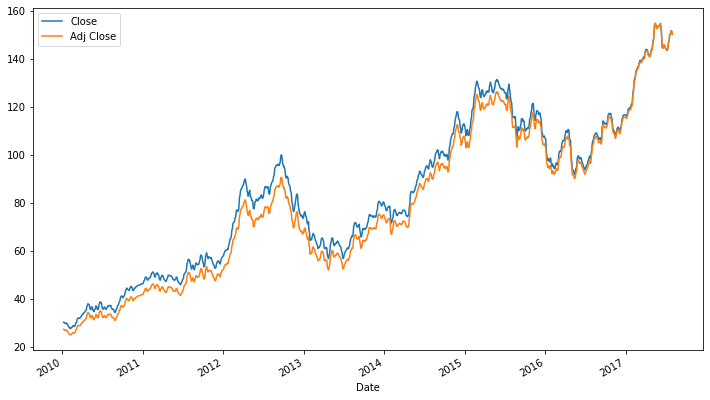

In [243]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

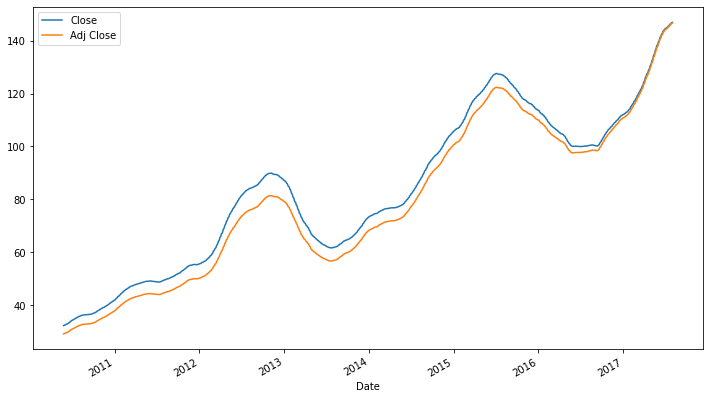

In [248]:
aapl.rolling(100)[['Close', 'Adj Close']].mean().plot();

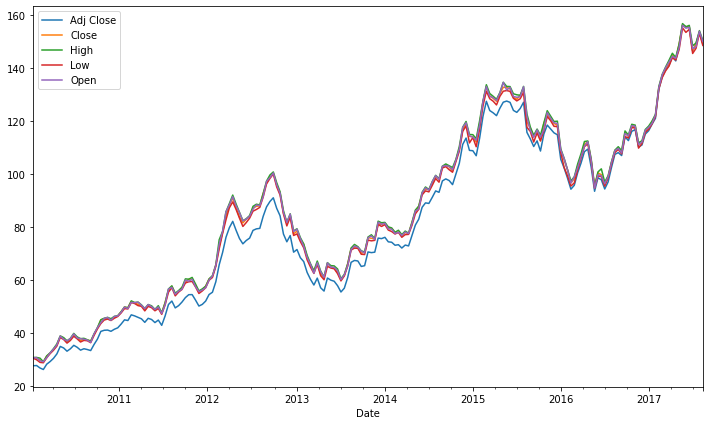

In [249]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

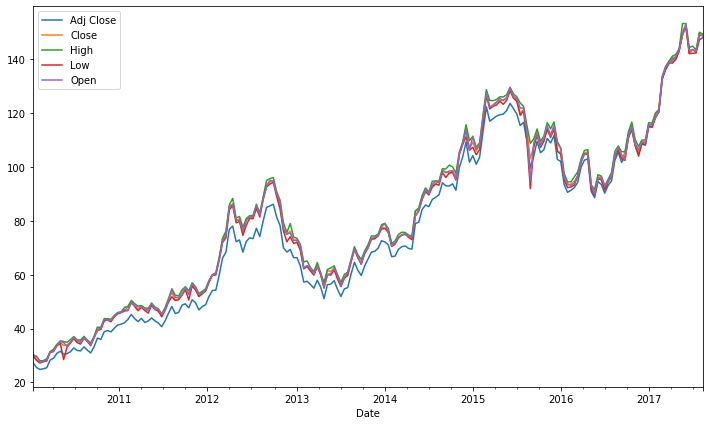

In [252]:
aapl.drop('Volume', axis=1).resample('2W').min().plot();

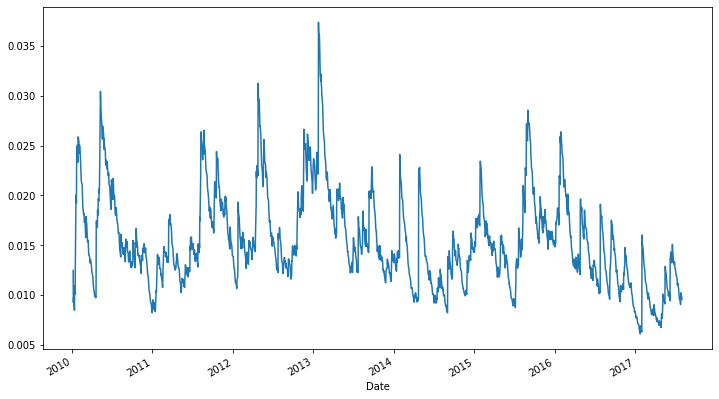

In [253]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

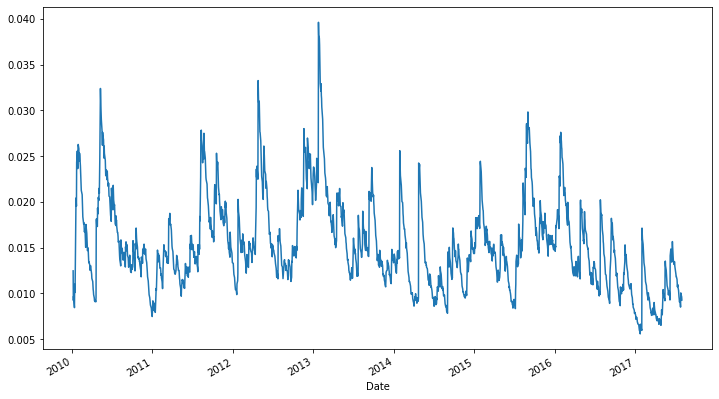

In [258]:
aapl['Close'].pct_change().ewm(span=25).std().plot();

In [261]:
from content.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [265]:
aguacate = read_avocadata('2010', '2012')
aguacate.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [266]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [267]:
aguacate.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

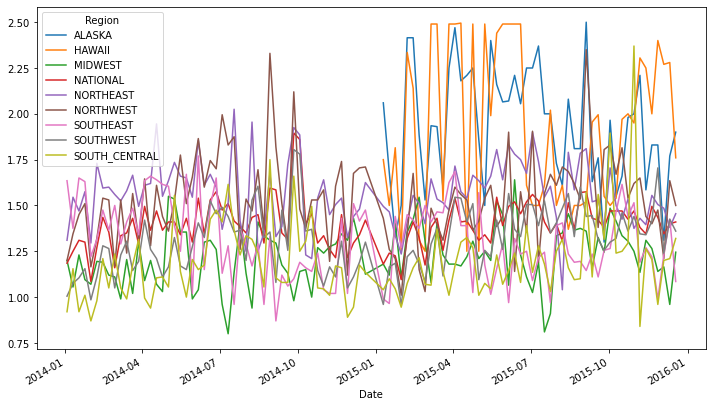

In [268]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

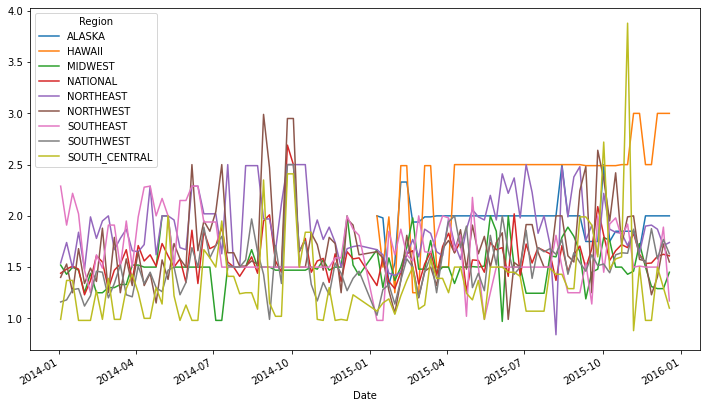

In [270]:
hola = aguacate[aguacate.Organic ==   True]
hola.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [271]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

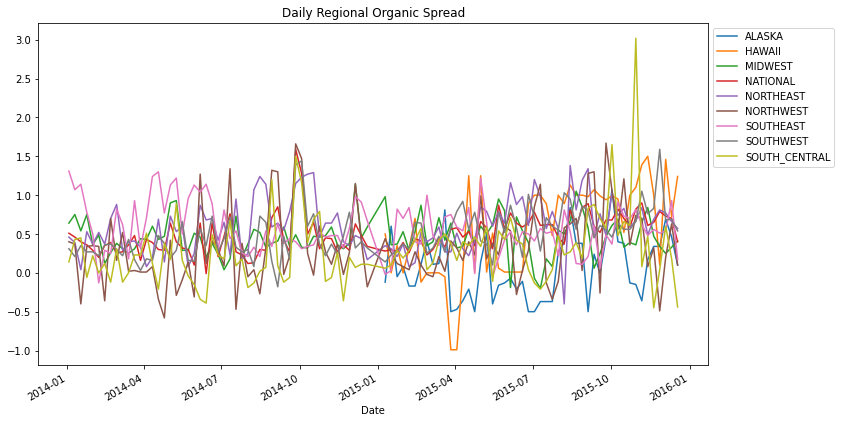

In [272]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [273]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


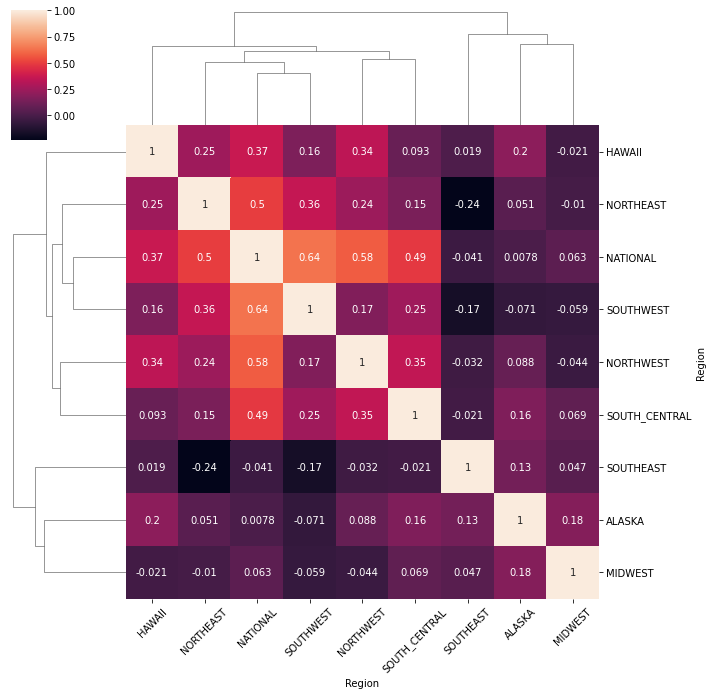

In [275]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);